## Getting Started

_course: quantum cyrptography for beginners
<br>date: 16 september 2022
<br>author: burton rosenberg_


### Installation

1. Please install [Anaconda](https://docs.anaconda.com/anaconda/install/).
1. The `conda` command is not available to create environments, and activate and disactivate them, and to install  packages.
1. Create a new environment, call it what you want, e.g. `qiskit`. Activate that environment. The command prompt changes to include the name of the activated environment.
1. With that environment activated, you might need to install jupyter with `conda install jupyter`.
1. Install the [qiskit package](https://qiskit.org/documentation/install.html). The qiskit packages is installed using `pip`. As per the instructions, take the option to install the visualization option.

The qiskit package allows you to write code on your host that will contact the IBM Quantum Experience to run, or simluate, your quantum circuits.

Options are to follow the install process exactly using the Python venv module, and to install Jupyter through pip rather than conda. Watch your command line prompts to activate and deactivate the environments correctly to you wishes.

Also note that Qiskit 1.0 is a [recent breaking change](https://www.ibm.com/quantum/blog/qiskit-1-launch) from Qiskit 0.x. If you have a previous Qiskit installation, discard it to prevent confusion.

### Quantum Computing Hardware

- For the moment, we will use various simulators rather than quantum hardware. This step is optional, and long queue times of hardware means this is better of a background task

IBM has been a pioneer in creating quantum computers. They make them available over the internet 
with its [IBM Quantum Channel](https://docs.quantum.ibm.com/guides/setup-channel#set-up-an-ibm-quantum-channel).

- Enroll at the [IBM Quantum Platform](https://quantum.ibm.com/) to get an IBMid (IBM ID).
- Get an API access token, a 128 character hexidecimal string.
- Use that token in the following code to get a list of available quantum computers in your channel.

The first time through, replace `None` with your API token. The API Token is security sensitive, so immediately
put back `None` after the first run. Qiskit will store the token in `~/.qiskit/qiskit-ibm.json`
so that you only need to present the token to the Qiskit library once.

- Learn about [IBM Quantum Hardware](https://docs.quantum.ibm.com/guides/execute-on-hardware).

Amazon has [Amazon Braket ](https://aws.amazon.com/braket/) that provides as a fee access to at least these quantum computers, 

- IonQ
- Rigetti
- IQM
- QuEra

as well as high quality simulators. Access these through your AWS account. 

These devices all use a *gate model* of quantum computation. 
DWave is an alternative quantum technology that progresses the Hamiltonian of a quantum system from a known 
starting point to and endpoint whose ground state is the solution to the posed problem. DWave also provides
access to their machines over the internet.



In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService

#api_token = 'abcdefghijklmnopqrstuvwxyz'
api_token = None

# Save an IBM Quantum account and set it as your default account.
if api_token:
    QiskitRuntimeService.save_account(
        channel="ibm_quantum",
        token=api_token,
        set_as_default=True,
        # Use `overwrite=True` if you're updating your token.
        overwrite=True,
    )

service = QiskitRuntimeService()

print('\nbackends available:')
for be in service.backends():
    st = be.status()
    if st.operational:
        print(f'\t{be.name}\tpending jobs:{st.pending_jobs}')
print('\n\n')



backends available:
	ibm_brisbane	pending jobs:7
	ibm_kyiv	pending jobs:460
	ibm_kyoto	pending jobs:186
	ibm_sherbrooke	pending jobs:4795





### Three Easy Qubits

A *Qubit* is a quantum state that when measured results in one of two measurements. The measurement result depends on both the qubit state and the measurement apparatus. To simplify things, we think of a the Z basis, where the result of 
the measurement is either a zero or a one, written in ket notation as $|0\rangle$ or $|1\rangle$. Measurements in the Z basis are called the *computational basis*. 

Examples physical systems used as qubits are,

- the sythetic atom at the heart of a [transmon](https://medium.com/qiskit/how-the-first-superconducting-qubit-changed-quantum-computing-forever-96cf261b8498) being measured in its ground state or first excited state, see also this [Qiskit note book](https://github.com/Qiskit/textbook/blob/main/notebooks/quantum-hardware-pulses/transmon-physics.ipynb);
- a photo polarization measured in one direction or the orthogonal direction, see this [animation](https://quantumatlas.umd.edu/entry/measuring-polarization/);
- electron spin in the up or down direction.

**There is a distinction between what the quantum state is and how it measures.**

While the measurement is binary, the state of a qubit is visualized as a point on the surface of the *Bloch sphere*, or as a complex-valued two-vector of length one.
The normalization of a vector in $\mathbb{C}^2$ places the vector on the surface of the Bloch sphere, plus a global phase which is not observable. The Bloch sphere is constructed so that orthgonal vectors are antipodal on the sphere.
The measurement convention places the Z axis north to south. 

If the qubit is in the state of the north pole it certainly will measure $|0\rangle$ in the computational basis, and if it is on the south pole it will certainly measure $|1\rangle$ in the computational basis.

The state of the qubit can be along the equator of the Bloch sphere. Aligned along the X axis are the states
$|+\rangle$ or $|-\rangle$. When measured in the computational basis, the state will be observed in the measurement's
direction of $|0\rangle$ or $|1\rangle$ with an unknown outcome until the measure is taken.


### The state vectors

In [33]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector  
from qiskit.visualization import plot_bloch_multivector

qc_zero = QuantumCircuit(1)
qc_one = QuantumCircuit(1)
qc_one.x(0)
qc_plus = QuantumCircuit(1)
qc_plus.h(0)

print('|0> state:', Statevector(qc_zero))
print('|1> state:', Statevector(qc_one))
print('|+> state:', Statevector(qc_plus))

|0> state: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))
|1> state: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))
|+> state: Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


### The Bloch Sphere

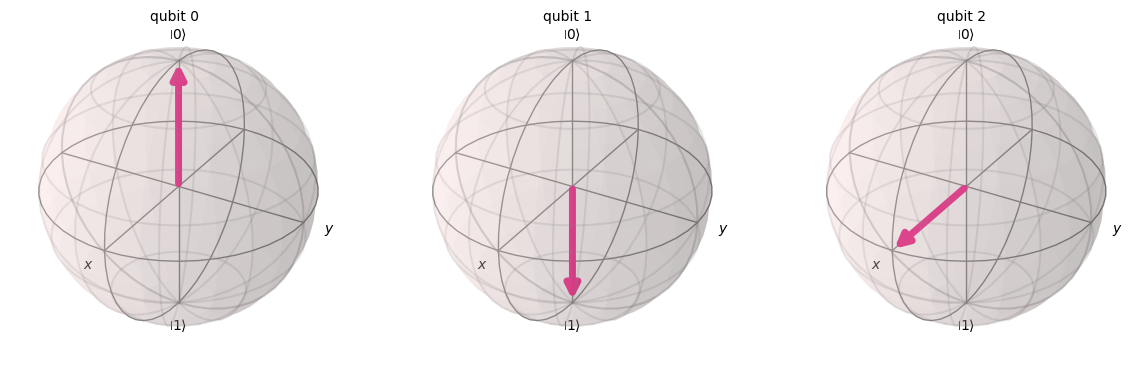

In [37]:
qc_3 = QuantumCircuit(3)
qc_3.x(1)
qc_3.h(2)
plot_bloch_multivector(Statevector(qc_3))

### The observations statistics

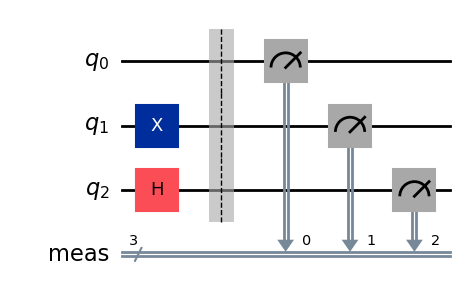

In [41]:
qc_3 = QuantumCircuit(3)
qc_3.x(1)
qc_3.h(2)
qc_3.measure_all()
qc_3.draw("mpl")

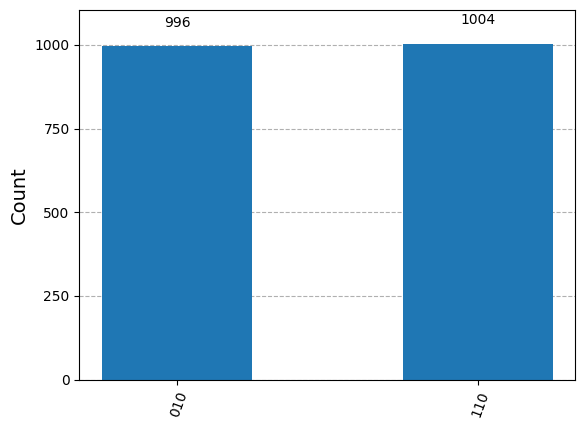

In [42]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()

# If you do not specify the number of shots, the default is 1024
result = backend.run(qc_3, shots=2000).result()   

# Extract the counts of 0 and 1 measurements
counts = result.get_counts()                    
plot_histogram(counts)

### End of Notebook